# Regressão Linear

## Equação da Reta

$$
\hat{y}_i = a x_i + b
$$

* No ajuste clássico (Mínimos Quadrados Ordinários), não usamos a distância **perpendicular** até a reta, e sim a **distância vertical (em y)**.

---

## Função de Custo (MSE)

$$
MSE(a,b) = \frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 
= \frac{1}{n} \sum_{i=1}^n \left( y_i - (a x_i + b) \right)^2
$$

### Definições:

* **n**: número de pontos
* **yᵢ**: valor observado
* **ŷᵢ = a·xᵢ + b**: valor previsto pelo modelo
* **rᵢ = yᵢ − ŷᵢ**: resíduo (erro vertical)

---

## Resíduos

Para cada ponto:

$$
r_i = y_i - \hat{y}_i = y_i - (a x_i + b)
$$

A função de custo é:

$$
J(a,b) = \frac{1}{n} \sum_{i=1}^n (r_i)^2
$$

* A reta de regressão tenta passar o mais próximo possível de todos os pontos.
* Se $\hat{y}_i = y_i$, então $r_i = 0$.

---

## Por que elevar ao quadrado?

* Garante contribuições **sempre positivas** (evita cancelamentos de erros positivos e negativos).
* Penaliza mais **erros grandes** (outliers).
* Suavidade: função diferenciável → solução convexa.
* Interpretação estatística: equivale à máxima verossimilhança se o ruído em $y$ é gaussiano.

---

## Fator $\tfrac{1}{n}$

* Transforma soma em **média**, tornando o custo comparável entre bases de tamanhos diferentes.
* Não altera a reta ótima ($\hat{a}, \hat{b}$).
* Melhora a **estabilidade do gradiente**.
* Às vezes se usa $\tfrac{1}{2n}$ por conveniência (cancela o “2” do gradiente).

---

## SSE vs MSE

* **SSE (Soma dos Quadrados dos Erros):**

$$
SSE = \sum r_i^2
$$

* **MSE (Erro Quadrático Médio):**

$$
MSE = \frac{1}{n} \sum r_i^2
$$

Exemplo:

* Resíduos {1, −1} → MSE = 1
* Duplicando pontos {1, −1, 1, −1} → MSE = 1
* Erros maiores {2, −2} → MSE = 4

---

## Gradiente Descendente

Função de custo:

$$
J(a,b) = \frac{1}{n} \sum (r_i)^2
$$

Gradientes:

$$
\frac{\partial J}{\partial a} = -\frac{2}{n} \sum x_i r_i
$$

$$
\frac{\partial J}{\partial b} = -\frac{2}{n} \sum r_i
$$

Atualizações:

$$
a_{novo} = a_{antigo} + \frac{2\eta}{n} \sum x_i r_i
$$

$$
b_{novo} = b_{antigo} + \frac{2\eta}{n} \sum r_i
$$

---

## Intuições

* $\sum r_i > 0 $ ⇒ aumentar $b$ (subestimando em média).
* $\sum x_i r_i > 0 $ ⇒ aumentar $a$ (subestimando mais quando $x$ é grande).
* “Tigela” convexa ⇒ único mínimo.

---

## Boas Práticas

* **Normalizar** $x$ acelera convergência.
* Escolha do **η (learning rate)**:

  * Muito grande → diverge.
  * Muito pequeno → converge devagar.
* Critérios de parada:

  * $\|\nabla J\|$ pequeno
  * Melhora < limiar
  * Iterações máximas atingidas
* Para grandes bases → usar **Mini-Batch/SGD**.

---

## Forma Vetorial

$$
\hat{y} = X\theta
$$

$$
r = y - \hat{y} = y - X\theta
$$

* A MSE é a **norma euclidiana ao quadrado** dos resíduos:

$$
J(\theta) = \frac{1}{n} \|y - X\theta\|^2
$$

---

## Box–Cox

Transformação de potência aplicada à variável-alvo $y$ para:

* Linearizar relações não lineares
* Estabilizar variância
* Aproximar resíduos de normalidade

### Cuidados:

* Domínio: $y > 0$ (senão usar Yeo–Johnson ou ajustar constante).
* Interpretação dos coeficientes é na escala transformada.
* Previsões precisam da **inversa da transformação**.

---

## Análise de Resíduos

* **Resíduos vs Ajustados** → detectar heterocedasticidade ou não linearidade.
* **Q-Q Plot** → verificar normalidade dos resíduos.
* **Scale-Location** → checar variância constante.
* **Resíduos vs Leverage** → identificar pontos influentes (Cook’s Distance).
* **Histograma** → distribuição dos resíduos.
* **Resíduos vs Ordem** → autocorrelação temporal.

---

## Regressão Linear Multivariada

* Vetor de resíduos:

$$
r = y - X\beta
$$

* Custo:

$$
J(\beta) = \frac{1}{n} \| y - X\beta \|^2
$$

* Condição de ótimo:

$$
X^T X \beta = X^T y
$$

* Solução:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

* Se $X^T X$ não é invertível → usar **pseudoinversa (Moore–Penrose)**.

---

## Correlação e R²

* Inclinação da reta vem da **covariância**.

* Se padronizar x e y (z-scores):

  $$
  \hat{y} = r x
  $$

  (reta com intercepto 0 e inclinação = correlação).

* Coeficiente de determinação:

$$
R^2 = r^2
$$

Indica a proporção da variância de $y$ explicada pela regressão.

## 2. Implementações básicas com NumPy

Abaixo estão funções utilitárias e algoritmos implementados **somente com NumPy**.


In [1]:

import numpy as np

# -----------------------------
# Utilitários gerais
# -----------------------------
def add_intercept(X):
    """
    Garante a coluna de 1s para o intercepto. Aceita vetor (n,) ou matriz (n, p).
    Retorna matriz (n, p+1) com a 1ª coluna de 1s.
    """
    X = np.asarray(X) # garante ndarray
    if X.ndim == 1: # se a dimensão for 1
        X = X.reshape(-1, 1) # transforma em (n,1)
    n = X.shape[0] # número de linhas
    return np.hstack([np.ones((n, 1)), X]) # concatena coluna de 1s

def mse(y_true, y_pred):
    y_true = np.asarray(y_true).ravel() # ravel() transforma em vetor 1D
    y_pred = np.asarray(y_pred).ravel()
    return np.mean((y_true - y_pred) ** 2) # erro quadrático médio

def r2_score(y_true, y_pred):
    y_true = np.asarray(y_true).ravel() 
    y_pred = np.asarray(y_pred).ravel()
    ss_res = np.sum((y_true - y_pred) ** 2) # soma dos quadrados dos resíduos
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2) # soma total dos quadrados
    return 1.0 - ss_res / ss_tot # R²

def standardize(X, with_mean=True, with_std=True, return_stats=False):
    """
    Padroniza colunas de X (sem intercepto).
    """
    X = np.asarray(X, dtype=float) # garante ndarray float
    mean_ = X.mean(axis=0) if with_mean else np.zeros(X.shape[1]) # média
    std_ = X.std(axis=0, ddof=0) if with_std else np.ones(X.shape[1]) # desvio padrão
    std_[std_ == 0] = 1.0 # evita divisão por zero
    Xs = (X - mean_) / std_ # padroniza
    return (Xs, mean_, std_) if return_stats else Xs # retorna só Xs

# -----------------------------
# Regressão linear (fechada)
# -----------------------------
def ols_normal_equation(X, y):
    """
    Solução fechada beta = (X^T X)^{-1} X^T y (com intercepto).
    Se (X^T X) for singular, cai para pseudoinversa.
    """
    X = add_intercept(X) # adiciona coluna de 1s
    y = np.asarray(y).reshape(-1, 1) # garante vetor coluna
    XtX = X.T @ X # X^T X
    Xty = X.T @ y # X^T y
    try:
        beta = np.linalg.solve(XtX, Xty) # resolve o sistema linear
    except np.linalg.LinAlgError: # se XtX for singular
        beta = np.linalg.pinv(X) @ y # pseudoinversa de Moore–Penrose
    y_hat = X @ beta # predições
    return beta.ravel(), y_hat.ravel() # retorna beta e y_hat como vetores 1D

def ols_via_svd(X, y):
    """
    Solução de menor norma via pseudoinversa de Moore–Penrose.
    """
    X = add_intercept(X) # adiciona coluna de 1s
    y = np.asarray(y).reshape(-1, 1) # garante vetor coluna
    U, s, Vt = np.linalg.svd(X, full_matrices=False) # SVD
    S_inv = np.diag(1.0 / s) # inversa dos valores singulares
    X_pinv = Vt.T @ S_inv @ U.T # pseudoinversa
    beta = X_pinv @ y # coeficientes
    y_hat = X @ beta # predições
    return beta.ravel(), y_hat.ravel() # retorna beta e y_hat como vetores 1D

# -----------------------------
# Gradiente descendente (simples)
# -----------------------------
def fit_simple_gd(x, y, eta=0.01, n_iters=10_000, tol=1e-12):
    """
    Gradiente descendente para regressão linear simples y ≈ a*x + b.
    Retorna (a, b, historico_mse).
    """
    x = np.asarray(x).ravel() # garante vetor 1D
    y = np.asarray(y).ravel() # garante vetor 1D
    a = 0.0 # coeficiente angular
    b = 0.0 # intercepto
    n = x.shape[0] # número de amostras
    history = [] # histórico do custo
    for it in range(n_iters): 
        y_pred = a * x + b # predições
        r = y - y_pred # resíduos
        grad_a = -(2.0 / n) * np.dot(x, r) # gradiente em a
        grad_b = -(2.0 / n) * np.sum(r) # gradiente em b
        a -= eta * grad_a # atualiza a
        b -= eta * grad_b # atualiza b
        J = np.mean(r ** 2) # custo (MSE)
        history.append(J) # armazena custo
        if it > 0 and abs(history[-2] - history[-1]) < tol: # critério de parada
            break
    return a, b, np.array(history)

# -----------------------------
# Diagnóstico: resíduos, leverage, Cook
# -----------------------------
def residuals_leverage_cook(X, y, beta):
    """
    Calcula resíduos, leverage (diag do chapéu) e distância de Cook.
    """
    X = add_intercept(X)
    y = np.asarray(y).reshape(-1, 1)
    beta = np.asarray(beta).reshape(-1, 1)
    y_hat = X @ beta
    r = (y - y_hat).ravel()
    n, p = X.shape  # p inclui intercepto
    XtX_inv = np.linalg.pinv(X.T @ X)
    # leverage h_ii = x_i^T (X^T X)^{-1} x_i
    h = np.einsum('ij,jk,ik->i', X, XtX_inv, X)
    # MSE não viesado (sigma^2 chapeu)
    sigma2_hat = np.sum(r**2) / (n - p)
    # Distância de Cook
    cook = (r**2 / (p * sigma2_hat)) * (h / (1 - h)**2)
    return r, h, cook, y_hat.ravel(), sigma2_hat

def standardized_residuals(r, h, sigma2_hat):
    """
    Resíduos padronizados: r_i / (s * sqrt(1 - h_i))
    """
    s = np.sqrt(sigma2_hat)
    denom = s * np.sqrt(1.0 - h)
    denom[denom == 0] = np.inf
    return r / denom

# -----------------------------
# Q–Q plot: aproximação do Phi^{-1}
# -----------------------------
def _norm_ppf(p):
    """
    Aproximação de Phi^{-1}(p) usando o método de Peter J. Acklam.
    Sem SciPy. Válido para p em (0,1).
    """
    p = np.asarray(p)
    # Coeficientes do racionais
    a = np.array([ -3.969683028665376e+01,  2.209460984245205e+02,
                  -2.759285104469687e+02,  1.383577518672690e+02,
                  -3.066479806614716e+01,  2.506628277459239e+00 ])
    b = np.array([ -5.447609879822406e+01,  1.615858368580409e+02,
                  -1.556989798598866e+02,  6.680131188771972e+01,
                  -1.328068155288572e+01 ])
    c = np.array([ -7.784894002430293e-03, -3.223964580411365e-01,
                  -2.400758277161838e+00, -2.549732539343734e+00,
                   4.374664141464968e+00,  2.938163982698783e+00 ])
    d = np.array([ 7.784695709041462e-03,  3.224671290700398e-01,
                   2.445134137142996e+00,  3.754408661907416e+00 ])
    plow  = 0.02425
    phigh = 1 - plow
    x = np.zeros_like(p, dtype=float)
    # Região baixa
    mask = (p < plow)
    if np.any(mask):
        q = np.sqrt(-2*np.log(p[mask]))
        x[mask] = (((((c[0]*q + c[1])*q + c[2])*q + c[3])*q + c[4])*q + c[5]) / \
                   ((((d[0]*q + d[1])*q + d[2])*q + d[3])*q + 1)
    # Região central
    mask = (p >= plow) & (p <= phigh)
    if np.any(mask):
        q = p[mask] - 0.5
        r = q*q
        x[mask] = (((((a[0]*r + a[1])*r + a[2])*r + a[3])*r + a[4])*r + a[5])*q / \
                   (((((b[0]*r + b[1])*r + b[2])*r + b[3])*r + b[4])*r + 1)
    # Região alta
    mask = (p > phigh)
    if np.any(mask):
        q = np.sqrt(-2*np.log(1 - p[mask]))
        x[mask] = -(((((c[0]*q + c[1])*q + c[2])*q + c[3])*q + c[4])*q + c[5]) / \
                    ((((d[0]*q + d[1])*q + d[2])*q + d[3])*q + 1)
    return x

def theoretical_normal_quantiles(n):
    """
    Quantis teóricos da Normal(0,1) para um Q–Q plot
    """
    i = np.arange(1, n+1)
    p = (i - 0.5) / n
    return _norm_ppf(p)

# -----------------------------
# Box–Cox
# -----------------------------
def boxcox_transform(y, lam):
    """
    Box–Cox para y>0.
    lam=0 => log(y)
    """
    y = np.asarray(y, dtype=float)
    if np.any(y <= 0):
        raise ValueError("Box–Cox requer y > 0.")
    if lam == 0.0:
        return np.log(y)
    return (np.power(y, lam) - 1.0) / lam

def boxcox_inverse(y_bc, lam):
    """
    Inversa da Box–Cox
    """
    y_bc = np.asarray(y_bc, dtype=float)
    if lam == 0.0:
        return np.exp(y_bc)
    return np.power(lam * y_bc + 1.0, 1.0/lam)

def profile_loglik_boxcox(y, X=None, lam_grid=None):
    """
    Calcula a profile log-likelihood de Box–Cox varrendo λ.
    ℓ(λ) = -(n/2) log(RSS(λ)/n) + (λ-1) * sum(log(y))
    onde RSS(λ) vem de uma regressão linear (com intercepto) de y(λ) em X.
    Se X=None, usa apenas intercepto.
    """
    y = np.asarray(y, dtype=float)
    if np.any(y <= 0):
        raise ValueError("Box–Cox requer y > 0.")
    if lam_grid is None:
        lam_grid = np.linspace(-2.0, 2.0, 401)  # passo 0.01
    logy_sum = np.sum(np.log(y))
    if X is None:
        X = np.zeros((len(y), 0))  # sem features além do intercepto
    ll = []
    for lam in lam_grid:
        y_bc = boxcox_transform(y, lam)
        beta, y_hat = ols_normal_equation(X, y_bc)
        rss = np.sum((y_bc - y_hat)**2)
        n = y.shape[0]
        ll_val = -(n/2.0)*np.log(rss/n) + (lam - 1.0)*logy_sum
        ll.append(ll_val)
    return lam_grid, np.array(ll)

def best_lambda_boxcox(y, X=None, lam_grid=None):
    lam_grid, ll = profile_loglik_boxcox(y, X, lam_grid)
    idx = np.argmax(ll)
    return lam_grid[idx], lam_grid, ll


## 3. Funções de visualização (matplotlib)

As funções abaixo geram gráficos úteis para inspeção e diagnóstico.


In [2]:

import numpy as np
import matplotlib.pyplot as plt

def plot_data_and_fit(x, y, a, b, title="Dados e reta ajustada (GD ou OLS)"):
    plt.figure()
    plt.scatter(x, y)
    xs = np.linspace(np.min(x), np.max(x), 200)
    ys = a*xs + b
    plt.plot(xs, ys)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

def plot_residuals_vs_fitted(y, y_hat):
    r = y - y_hat
    plt.figure()
    plt.scatter(y_hat, r)
    plt.axhline(0, linestyle="--")
    plt.title("Resíduos vs Ajustados")
    plt.xlabel("Ajustados (ŷ)")
    plt.ylabel("Resíduos (r)")
    plt.show()

def plot_histogram_residuals(r, bins=20):
    plt.figure()
    plt.hist(r, bins=bins)
    plt.title("Histograma dos resíduos")
    plt.xlabel("Resíduo")
    plt.ylabel("Frequência")
    plt.show()

def plot_scale_location(y_hat, r, h, sigma2_hat):
    sr = standardized_residuals(r, h, sigma2_hat)
    plt.figure()
    plt.scatter(y_hat, np.sqrt(np.abs(sr)))
    plt.title("Scale–Location (sqrt|resíduo padronizado| vs ajustado)")
    plt.xlabel("Ajustados (ŷ)")
    plt.ylabel("sqrt(|resíduo padronizado|)")
    plt.show()

def plot_residuals_order(r):
    plt.figure()
    plt.plot(np.arange(len(r)), r)
    plt.axhline(0, linestyle="--")
    plt.title("Resíduos vs Ordem")
    plt.xlabel("Índice da observação")
    plt.ylabel("Resíduo")
    plt.show()

def plot_qq(r, h, sigma2_hat):
    sr = np.sort(standardized_residuals(r, h, sigma2_hat))
    q_theo = theoretical_normal_quantiles(len(sr))
    plt.figure()
    plt.scatter(q_theo, sr)
    # linha de referência
    q1, q3 = np.percentile(sr, [25, 75])
    t1, t3 = np.percentile(q_theo, [25, 75])
    slope = (q3 - q1) / (t3 - t1) if t3 != t1 else 1.0
    intercept = q1 - slope * t1
    xs = np.linspace(q_theo.min(), q_theo.max(), 200)
    plt.plot(xs, slope*xs + intercept)
    plt.title("Q–Q Plot (resíduos padronizados vs Normal)")
    plt.xlabel("Quantis teóricos N(0,1)")
    plt.ylabel("Quantis empíricos (resíduos padronizados)")
    plt.show()

def plot_residuals_vs_leverage(h, r, sigma2_hat, p, title="Resíduos padronizados vs Leverage (Cook)"):
    sr = standardized_residuals(r, h, sigma2_hat)
    plt.figure()
    plt.scatter(h, sr)
    # linhas de Cook (aproximadas): |sr| = sqrt( D * p * (1 - h) / h )
    # Desenha para D = 0.5 e 1.0
    h_grid = np.linspace(1e-6, min(0.99, np.max(h)*1.05), 300)
    for D in [0.5, 1.0]:
        bound = np.sqrt(D * p * (1 - h_grid) / h_grid)
        plt.plot(h_grid,  bound, linestyle="--")
        plt.plot(h_grid, -bound, linestyle="--")
    plt.title(title)
    plt.xlabel("Leverage (hii)")
    plt.ylabel("Resíduo padronizado")
    plt.show()


## 4. Exemplos de uso (dados sintéticos)

Esta seção demonstra as funções anteriores em dados simulados.


OLS (fechado): b0 = 0.798071143665493  b1 = 2.524551960255705
MSE: 0.8439681532568765 R2: 0.9846125855505642
GD (simples): b0 = 0.7980691488951936  b1 = 2.5245522604394957   iterações: 2464


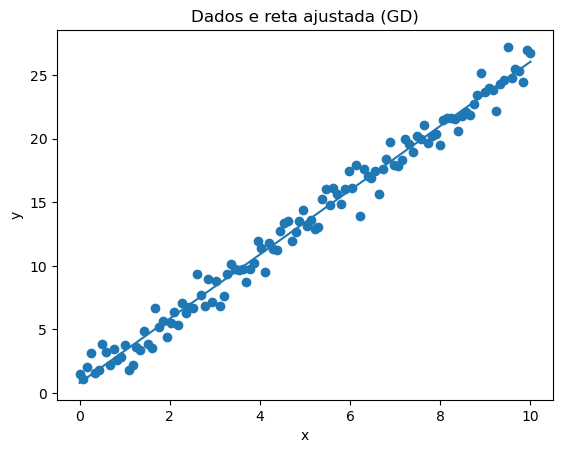

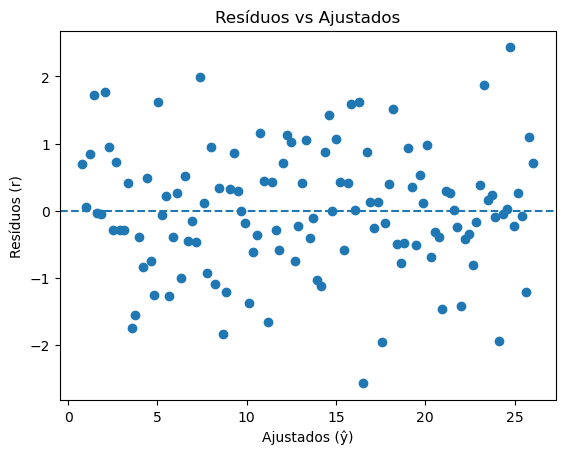

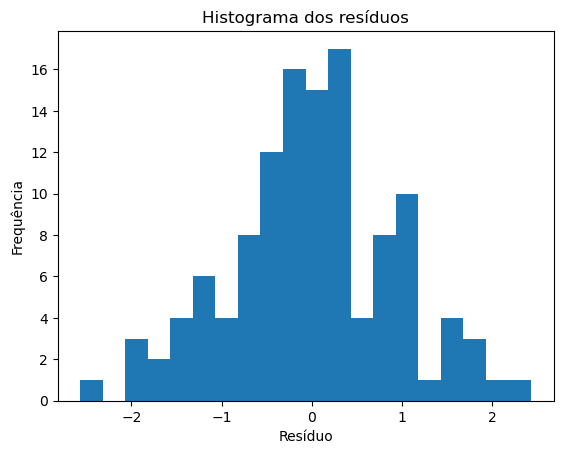

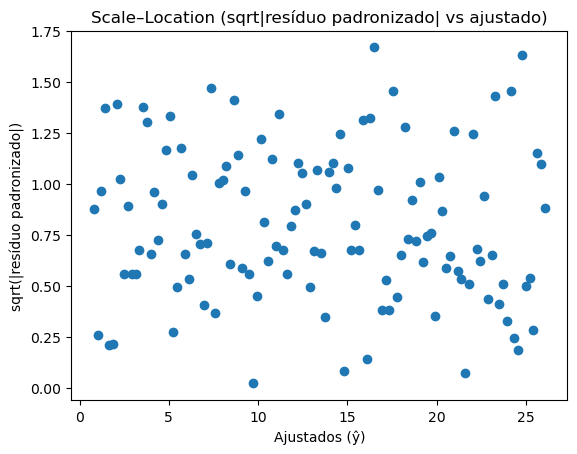

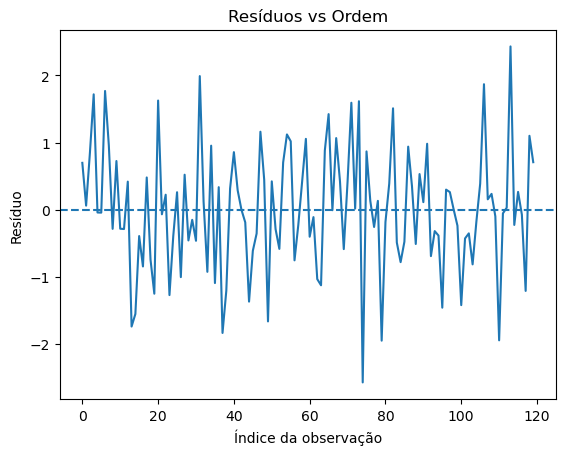

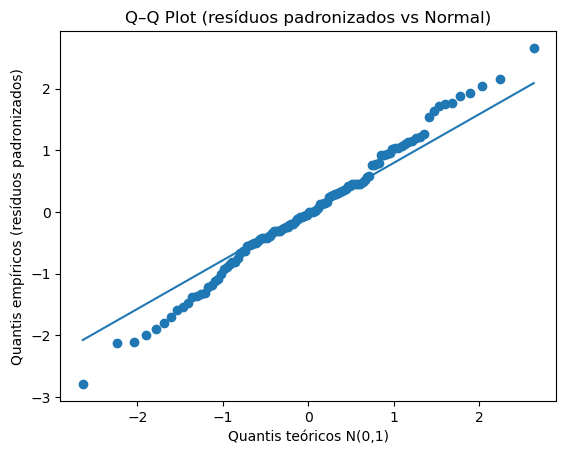

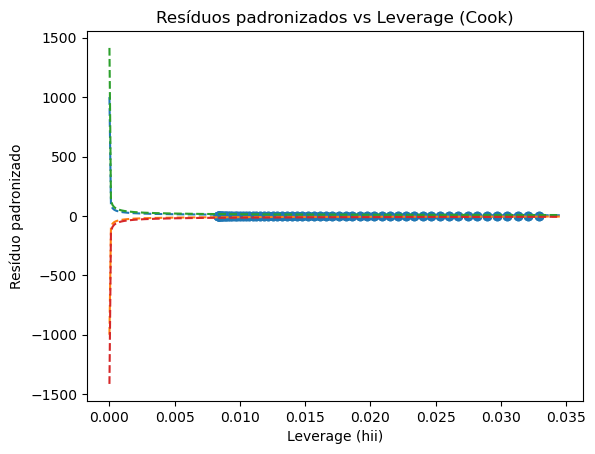

Melhor lambda (Box–Cox): -0.96


In [3]:

# Dados sintéticos: y = 2.5x + 1 + ruído
np.random.seed(42)
n = 120
x = np.linspace(0, 10, n)
y = 2.5 * x + 1.0 + np.random.normal(0, 1.0, size=n)

# --- Ajuste com solução fechada (OLS)
beta, y_hat = ols_normal_equation(x, y)
b0, b1 = beta[0], beta[1]
print("OLS (fechado): b0 =", b0, " b1 =", b1)
print("MSE:", mse(y, y_hat), "R2:", r2_score(y, y_hat))

# --- Ajuste com GD
a, b, hist = fit_simple_gd(x, y, eta=0.01, n_iters=50_000, tol=1e-14)
print("GD (simples): b0 =", b, " b1 =", a, "  iterações:", len(hist))

# --- Plots
plot_data_and_fit(x, y, a, b, title="Dados e reta ajustada (GD)")
plot_residuals_vs_fitted(y, y_hat)
r, h, cook, yhat2, s2 = residuals_leverage_cook(x, y, beta)
plot_histogram_residuals(r)
plot_scale_location(yhat2, r, h, s2)
plot_residuals_order(r)
plot_qq(r, h, s2)
p = 2  # intercepto + 1 feature
plot_residuals_vs_leverage(h, r, s2, p)

# --- Box–Cox (sobre um alvo positivo)
y_pos = 5 + np.exp(0.3*x) + np.random.normal(0, 0.2, size=n)  # garante y>0
lam_best, lam_grid, ll = best_lambda_boxcox(y_pos, X=x.reshape(-1,1))
print("Melhor lambda (Box–Cox):", lam_best)
